In [29]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
 1. Cargar y Explorar los Datos

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

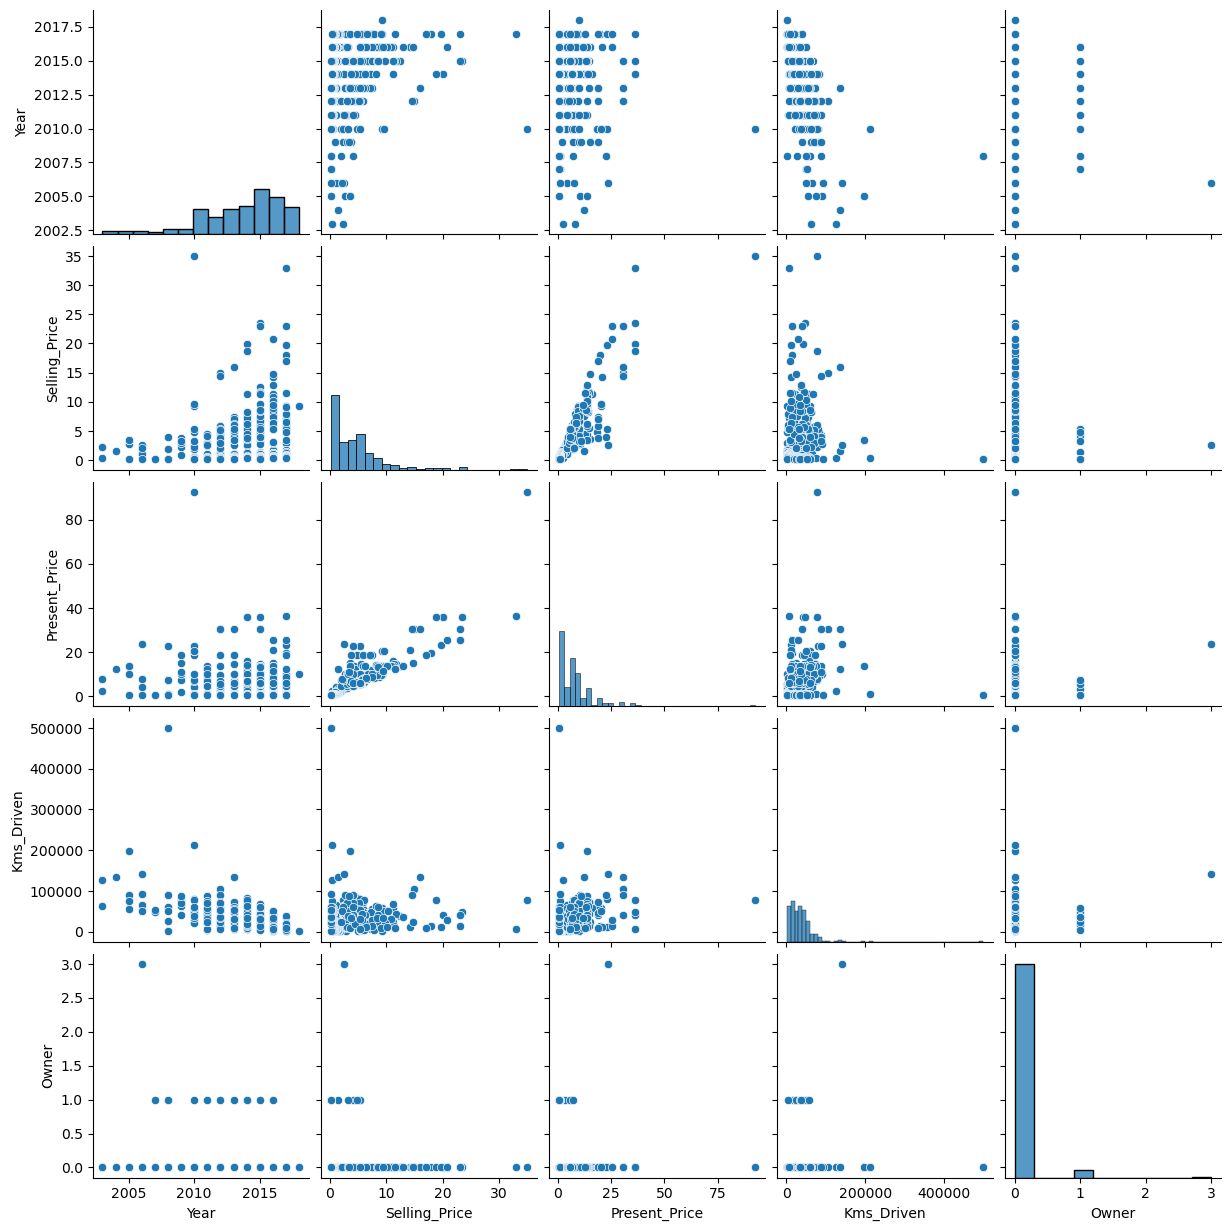

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("C:/Users/saaanti/Downloads/archive (1)/car data.csv")

# Primer vistazo
print(df.head())
print(df.info())
print(df.describe())

# Valores nulos
print(df.isnull().sum())

# Gráficas exploratorias
sns.pairplot(df)
plt.show()

In [ ]:
2. Procesamiento de Datos

In [13]:
# Convertir columnas categóricas a numéricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificar nuevamente
print(df_encoded.head())

   Year  Selling_Price  Present_Price  Kms_Driven  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0               False   
1  2013           4.75           9.54       43000      0               False   
2  2017           7.25           9.85        6900      0               False   
3  2011           2.85           4.15        5200      0               False   
4  2014           4.60           6.87       42450      0               False   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False   

   Car_Name_Bajaj Avenger 150 street  ...  Car_Name_swif

In [ ]:
3. Selección de Características

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Selección de las mejores características
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(scores.sort_values(by='Score', ascending=False))


                    Feature        Score
1             Present_Price  1015.923320
101        Fuel_Type_Diesel   131.264543
103  Seller_Type_Individual   130.164012
102        Fuel_Type_Petrol   123.445920
84        Car_Name_fortuner   121.963547
..                      ...          ...
95           Car_Name_swift     0.002886
69            Car_Name_brio     0.002796
88           Car_Name_ignis     0.002206
82        Car_Name_etios gd     0.000305
80     Car_Name_etios cross     0.000091

[105 rows x 2 columns]


In [ ]:
4. División Train/Test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 5. Entrenamiento de Modelos

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
6. Evaluación del Modelo

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Para Regresión Lineal
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Para Árbol
y_pred_tree = tree.predict(X_test)
print("\nDecision Tree:")
print("R2 Score:", r2_score(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))


Linear Regression:
R2 Score: 0.599503818404165
RMSE: 3.037377757409237

Decision Tree:
R2 Score: 0.9251138666185316
RMSE: 1.3134100102049415


In [ ]:
 7. Visualización de Resultados

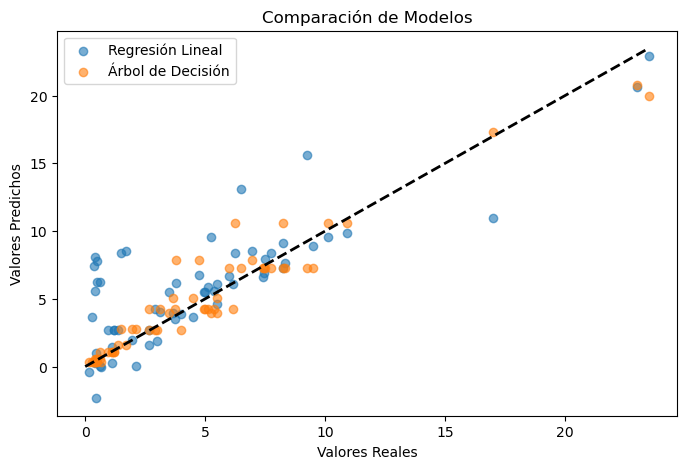

In [25]:
# Comparar Predicho vs Real
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Regresión Lineal')
plt.scatter(y_test, y_pred_tree, alpha=0.6, label='Árbol de Decisión')
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.legend()
plt.title("Comparación de Modelos")
plt.show()


In [ ]:
Célula de Evaluación y Visualización de Resultados – Regresión Lineal

In [33]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [62]:
predicciones = modelo.predict(X_test)


Evaluación del Modelo de Regresión Lineal
Error cuadrático medio (MSE): 9.23
Coeficiente de determinación (R²): 0.5995


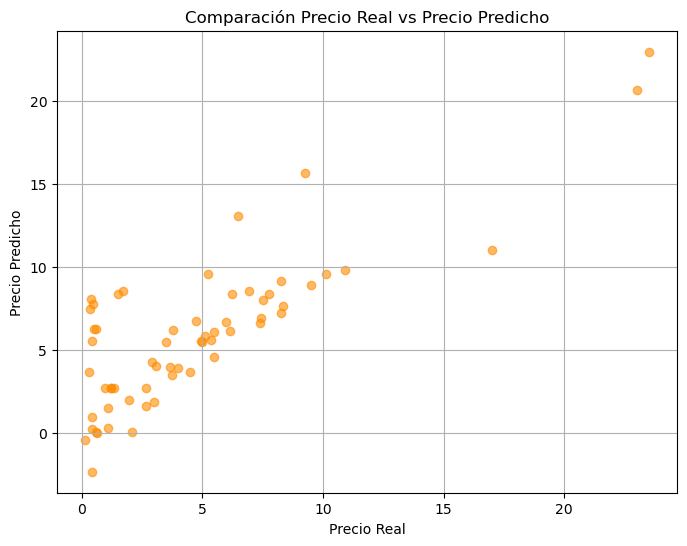

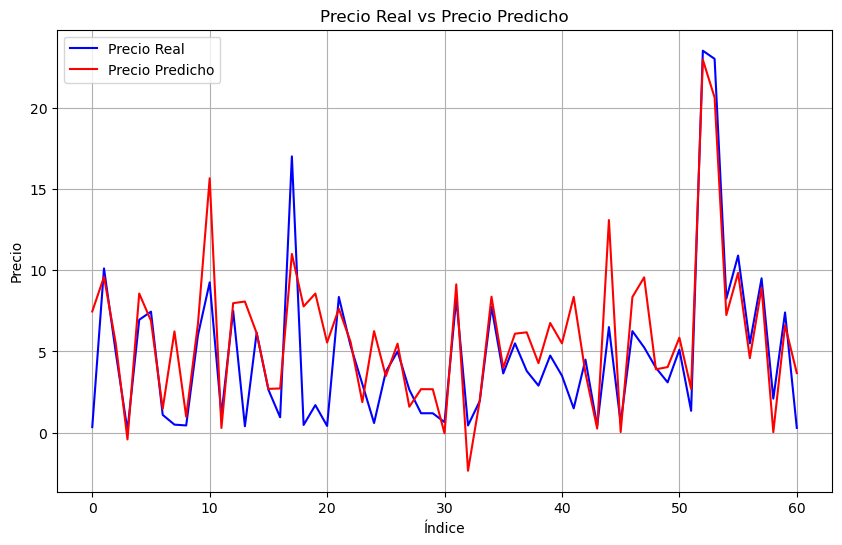

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Realizar predicciones
predicciones = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Evaluación del Modelo de Regresión Lineal")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

# Gráfico de dispersión: Precio Real vs Precio Predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones, alpha=0.6, color='darkorange')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Comparación Precio Real vs Precio Predicho')
plt.grid(True)
plt.show()

# Línea de regresión comparando ambas curvas
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Precio Real', color='blue')
plt.plot(predicciones, label='Precio Predicho', color='red')
plt.title('Precio Real vs Precio Predicho')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Árbol de Decisión para Regresión

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Crear el modelo
modelo_arbol = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones
predicciones_arbol = modelo_arbol.predict(X_test)

# Evaluar el modelo
mse_arbol = mean_squared_error(y_test, predicciones_arbol)
r2_arbol = r2_score(y_test, predicciones_arbol)

print("Evaluación del Árbol de Decisión")
print(f"Error Cuadrático Medio (MSE): {mse_arbol:.2f}")
print(f"R² Score: {r2_arbol:.4f}")


Evaluación del Árbol de Decisión
Error Cuadrático Medio (MSE): 1.73
R² Score: 0.9251


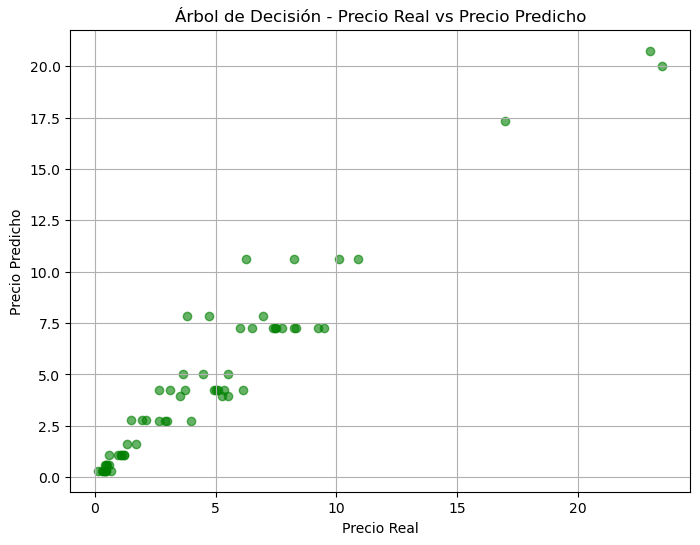

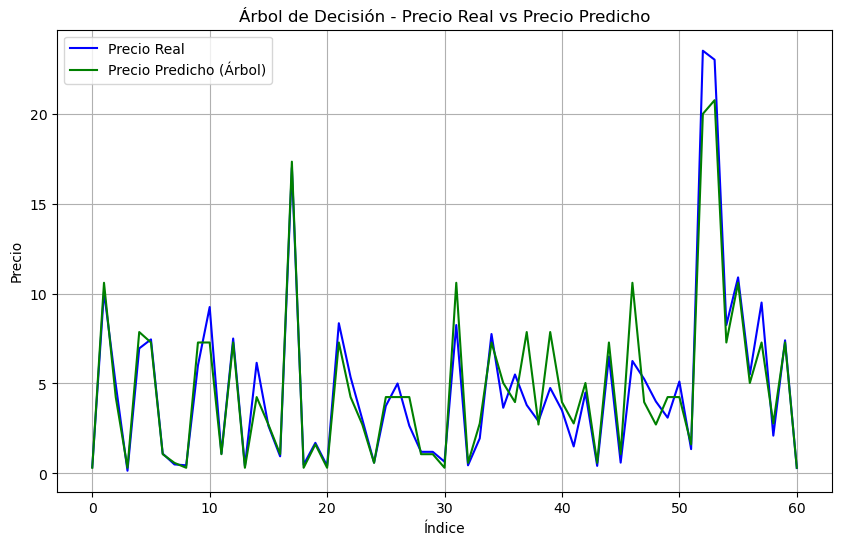

In [45]:
# Comparación visual: Dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones_arbol, alpha=0.6, color='green')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Árbol de Decisión - Precio Real vs Precio Predicho")
plt.grid(True)
plt.show()

# Curvas paralelas: Precio Real vs Predicho
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Precio Real', color='blue')
plt.plot(predicciones_arbol, label='Precio Predicho (Árbol)', color='green')
plt.title("Árbol de Decisión - Precio Real vs Precio Predicho")
plt.xlabel("Índice")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Análisis del Árbol de desción. 

R² Score = 0.9251
Este valor indica que el modelo explica el 92.51% de la variabilidad del precio real de los autos. Es una señal de que el modelo se ajusta muy bien a los datos. Un R² cercano a 1 significa que las predicciones están muy cerca de los valores reales. En comparación con la regresión lineal (donde tenías R² ≈ 0.28), esto es una mejora enorme.

MSE = 1.73
El Error Cuadrático Medio mide el promedio de los errores al cuadrado. En este caso, los errores de predicción en promedio son muy bajos.
